In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
from google.colab import files
files.upload()
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d kazanova/sentiment140
!unzip sentiment140.zip

Saving kaggle.json to kaggle.json
 78% 63.0M/80.9M [00:00<00:00, 168MB/s]
100% 80.9M/80.9M [00:00<00:00, 205MB/s]
Archive:  sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


In [15]:
#Loading the Dataset
cols=['target','ids','date','flag','user','Tweets']
df = pd.read_csv('./training.1600000.processed.noemoticon.csv', encoding = 'latin',names=cols)
df = df.iloc[800000-1000:800000+1000]
df = df.reset_index()
df.drop('index',axis=1,inplace=True)
df = df.drop(['ids','date','flag','user'],axis=1

In [36]:
df["target"].value_counts()

4    1000
0    1000
Name: target, dtype: int64

In [16]:
df.head()

,target,Tweets
0,0,"CAN'T BEAT LIVE MUSIC, WISH I COULD SING BUT I..."
1,0,Charlie lost an angel today Very sad http:...
2,0,"at work, and very bored"
3,0,It's weird how celebrities go in threes. Carra...
4,0,@adelate Farrah's dead? Had no idea.. RIP Farr...


In [18]:
def cleanTxt(text):
 text = re.sub(r'@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub(r'#', '', text) # Removing '#' hash tag
 text = re.sub(r'RT[\s]+', '', text) # Removing RT
 text = re.sub(r'https?:\/\/\S+', '', text) # Removing hyperlink
 return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)
df


,target,Tweets
0,0,"CAN'T BEAT LIVE MUSIC, WISH I COULD SING BUT I..."
1,0,Charlie lost an angel today Very sad
2,0,"at work, and very bored"
3,0,It's weird how celebrities go in threes. Carra...
4,0,"Farrah's dead? Had no idea.. RIP Farrah, inde..."
...,...,...
1995,4,I have this strange desire to go to confession...
1996,4,_reporter answer sent in dm. try it
1997,4,cuz ur 3pm is my 9am and Id be either asleep ...
1998,4,Its all good. Just figured you would like to ...


In [19]:
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,target,Tweets,Subjectivity,Polarity
0,0,"CAN'T BEAT LIVE MUSIC, WISH I COULD SING BUT I...",0.500000,0.136364
1,0,Charlie lost an angel today Very sad,1.000000,-0.650000
2,0,"at work, and very bored",1.000000,-0.650000
3,0,It's weird how celebrities go in threes. Carra...,1.000000,-0.500000
4,0,"Farrah's dead? Had no idea.. RIP Farrah, inde...",0.400000,-0.200000
...,...,...,...,...
1995,4,I have this strange desire to go to confession...,0.150000,-0.152588
1996,4,_reporter answer sent in dm. try it,0.000000,0.000000
1997,4,cuz ur 3pm is my 9am and Id be either asleep ...,0.785714,0.303571
1998,4,Its all good. Just figured you would like to ...,0.600000,0.700000


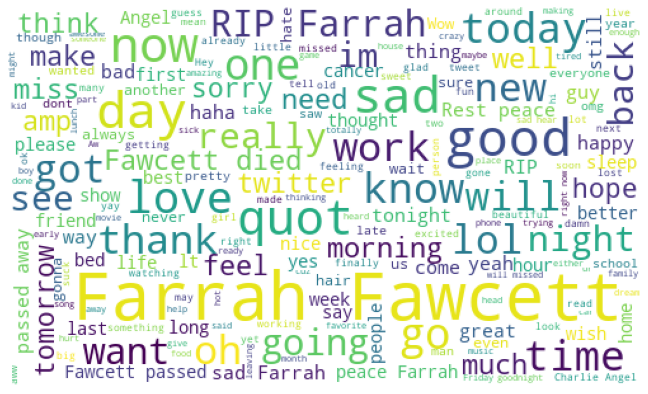

In [20]:
# creating a wordcloud
plt.figure(figsize=(14,7))
all = ' '.join([current_tweet for current_tweet in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, background_color="white", random_state=21).generate(all)
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

In [21]:
def getAnalysis(score):
  if score < 0:
    return "Negative"
  elif score == 0:
    return "Neutral"
  else :
    return "Positive"
df['Analysis']=df['Polarity'].apply(getAnalysis)
df

,target,Tweets,Subjectivity,Polarity,Analysis
0,0,"CAN'T BEAT LIVE MUSIC, WISH I COULD SING BUT I...",0.500000,0.136364,Positive
1,0,Charlie lost an angel today Very sad,1.000000,-0.650000,Negative
2,0,"at work, and very bored",1.000000,-0.650000,Negative
3,0,It's weird how celebrities go in threes. Carra...,1.000000,-0.500000,Negative
4,0,"Farrah's dead? Had no idea.. RIP Farrah, inde...",0.400000,-0.200000,Negative
...,...,...,...,...,...
1995,4,I have this strange desire to go to confession...,0.150000,-0.152588,Negative
1996,4,_reporter answer sent in dm. try it,0.000000,0.000000,Neutral
1997,4,cuz ur 3pm is my 9am and Id be either asleep ...,0.785714,0.303571,Positive
1998,4,Its all good. Just figured you would like to ...,0.600000,0.700000,Positive


In [22]:
# Printing the positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) CAN'T BEAT LIVE MUSIC, WISH I COULD SING BUT I CAN'T 

2) R.I.P. Farrah Fawcett...  A super-hottie to the end.  Now a real angel.

3) Yay, Haruhi Endless Eight part 2/3! And I thought two episodes were too many 

4) We really need to keep doing our parts to help find a cure for cancer. Too many lives have been loss to cancer. RIP Aunt Alice I love you 

5) Ah huge bummer. R.I.P. Sky Saxon. The Seeds owned it in their day   

6)  I jinxed my good mood, I say I'm happy and all that cause Nicks the father to sharons baby and now Farrah dies... didn't know her but its

7) ahh it's too nice out, don't want to be at work right now 

8) The lasagna wasn't very good today    thank god for snickers bars...

9)  oh no, just read it on bbc breaking news. Waay to young 

10) I am not looking forward to telling my mom  She loved Farrah as much as she loved Bea (and I feel the same as well).

11) RIP Farrah Fawcett  She was only 62. And still beautiful. Sad week for cel

In [23]:
# Printing the negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) Charlie lost an angel today   Very sad   

2) at work, and very bored 

3) It's weird how celebrities go in threes. Carradine, McMahon and now Farrah. 

4)  Farrah's dead? Had no idea.. RIP Farrah, indeed. 

5) Very sad news.  Farrah Fawcett passed away.  

6) I'm so sad to hear the news about Farrah Fawcett... She was a Corpus Christi native, and will be missed dearly. 

7) Rest in peace Farrah Fawcett.  so sad.

8) Rest in peace Farrah  What a sad day

9)  aw it doesn't DVR... It's online only at  Sorry  It streams only only.

10) Sick  I might have Influenza AH1N1 

11) on a brighter note, tmrw's pay day and is a little meaningless to me coz i have many things to settle on n ZARA is waving at me already 

12)  It is sad... she battled colon cancer for 2+ years 

13) Just made a small scratch on my iPhone  .. Bumped it against the tp holder. Public stalls are way too small! TT__TT

14) rest in peace farrah fawcett. how sad. 

15) 19 I know girl. So sad  

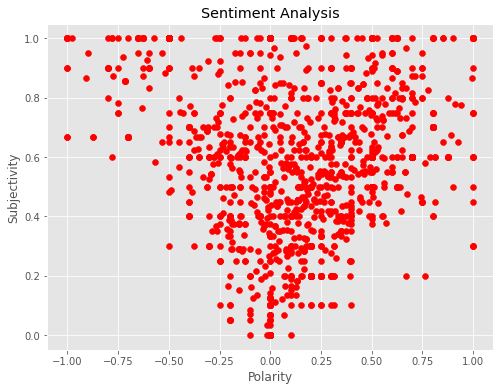

In [24]:
# Plotting the graph
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='red') 
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [25]:
# Printing the percentage of positive tweets
positive_tweets = df[df.Analysis == 'Positive']
positive_tweets = positive_tweets['Tweets']
positive_tweets

round( (positive_tweets.shape[0] / df.shape[0]) * 100 , 1)

41.3

In [26]:
# Printing the percentage of negative tweets
negative_tweets = df[df.Analysis == 'Negative']
negative_tweets = negative_tweets['Tweets']
negative_tweets

round( (negative_tweets.shape[0] / df.shape[0]) * 100, 1)

23.5

In [27]:
# Printing the percentage of neutral tweets
positive_tweets = df[df.Analysis == 'Neutral']
positive_tweets = positive_tweets['Tweets']
positive_tweets

round( (positive_tweets.shape[0] / df.shape[0]) * 100 , 1)

35.2

In [28]:
# displayingthe value counts
df['Analysis'].value_counts()

Positive    826
Neutral     704
Negative    470
Name: Analysis, dtype: int64

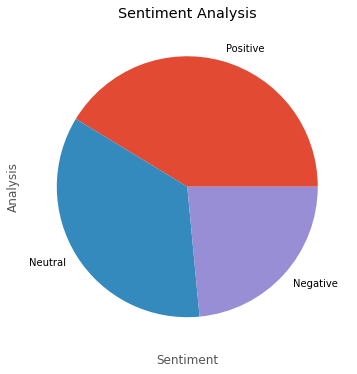

In [29]:
# Plotting and visualizing the counts
plt.figure(figsize=(8,6))
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'pie')
plt.show()

In [35]:
def getLabel(x):
  if x=="Positive" : return 4
  else: return 0
df["predicted"]=df["Analysis"].apply(getLabel)
df.head()

,target,Tweets,Subjectivity,Polarity,Analysis,predicted
0,0,"CAN'T BEAT LIVE MUSIC, WISH I COULD SING BUT I...",0.5,0.136364,Positive,4
1,0,Charlie lost an angel today Very sad,1.0,-0.650000,Negative,0
2,0,"at work, and very bored",1.0,-0.650000,Negative,0
3,0,It's weird how celebrities go in threes. Carra...,1.0,-0.500000,Negative,0
4,0,"Farrah's dead? Had no idea.. RIP Farrah, inde...",0.4,-0.200000,Negative,0


In [37]:
predicted = pd.concat([df[df['Analysis']=="Positive"], df[df['Analysis']=="Negative"]])

In [38]:
from sklearn.metrics import accuracy_score
print(accuracy_score(predicted['predicted'], predicted['target']))

0.6952160493827161
